In [23]:
data <- read.csv("../results/NYSubmissionsEnrichedExpanded.csv")
head(data, 5)

,Remedy.Case.Number,Organizational.level.of.submission,Facility.of.Occurrence,Facility.Received,Receiving.Office,Case.Status,Status.Reason.1,Status.Reason.2,Status.Reason.3,Status.Reason.4,...,Rejected.due.to.inmate.not.providing.an.attachment.with.the.submission,Remedy.Case.Submission.Rejected...Wrong.Level,Remedy.Case.Submission.Rejected...Other.Reasons,Primary.and.Secondary.Remedy.Subject.Codes.concatenated,Total.number.of.submissions.associated.with.this.CASENBR..Original.complaint...all.appeals.,Number.of.appeals,Date.of.initial.complaint.for.this.CASENBR,Date.of.lastest.status.assignment.for.this.CASENBR,Days.between.initial.complaint.and.latest.status.assignment.for.this.CASENBR,Remedy.Subject.Code.Translation
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>
1,205452,Region,NEW YORK CCM,ALLENWOOD FPC,NER,Rejected,OTHER/SEE REMARKS,REJECTED: YOU MAY RESUBMIT YOUR APPEAL IN PROPER FORM WITHIN 10 DAYS OF THE DATE OF THIS REJECTION NOTICE.,,,...,0,0,1,20E,1,0,2000-01-31,2000-02-07,7,DHO/CDC/CONT. HOUSING APPEALS: CONTRACT COMM. CORR. CTR. DISCIPLINE - MAJOR SANCTIONS
2,202524,Region,BROOKLYN MDC,BROOKLYN MDC,NER,Rejected,"REJECTED: YOU MAY ONLY SUBMIT UP TO ONE LETTER-SIZE (8 1/2"" X 11"") CONTINUATION PAGE.",REJECTED: YOU MAY RESUBMIT YOUR APPEAL IN PROPER FORM WITHIN 10 DAYS OF THE DATE OF THIS REJECTION NOTICE.,,,...,0,0,0,20A,3,2,2000-01-10,2000-03-20,70,DHO/CDC/CONT. HOUSING APPEALS: DHO APPEAL - PROCEDURES
3,203538,Region,BROOKLYN MDC,BROOKLYN MDC,NER,Rejected,REJECTED: YOU ARE APPEALING MORE THAN ONE INCIDENT REPORT (INCIDENT NUMBER) ON A SINGLE APPEAL FORM. YOU MUST FILE A SEPARATE APPEAL FOR EACH INCIDENT REPORT (INCIDENT NUMBER) YOU WISH TO APPEAL.,REJECTED: YOU DID NOT PROVIDE A COPY OF THE DHO REPORT; OR YOU DID NOT OTHERWISE IDENTIFY THE CHARGES AND DATE OF THE DHO ACTION YOU ARE APPEALING.,REJECTED: YOU MAY RESUBMIT YOUR APPEAL IN PROPER FORM WITHIN 10 DAYS OF THE DATE OF THIS REJECTION NOTICE.,,...,0,0,0,20D,1,0,2000-01-07,2000-01-10,3,"DHO/CDC/CONT. HOUSING APPEALS: DHO APPEAL - COMBINED (PROCEDURES, EVIDENCE & SANCTIONS)"
4,203522,Region,BROOKLYN MDC,BROOKLYN MDC,NER,Closed Denied,DENIED: REQUEST OR APPEAL DENIED SUBSTANTIALLY IN FULL.,,,,...,NA,NA,NA,20D,1,0,2000-01-05,2000-02-03,29,"DHO/CDC/CONT. HOUSING APPEALS: DHO APPEAL - COMBINED (PROCEDURES, EVIDENCE & SANCTIONS)"
5,203517,Region,BROOKLYN MDC,BROOKLYN MDC,NER,Rejected,REJECTED: YOU MUST FIRST FILE A BP-9 REQUEST THROUGH THE INSTITUTION FOR THE WARDEN'S REVIEW AND RESPONSE BEFORE FILING AN APPEAL AT THIS LEVEL.,,,,...,0,0,0,10Z,1,0,2000-01-03,2000-01-10,7,TRANSFER - REQUEST/OBJECTION: TRANSFER - OTHER


In [2]:
summary(data)


 Remedy.Case.Number Organizational.level.of.submission Facility.of.Occurrence
 Min.   : 157212    Length:44979                       Length:44979          
 1st Qu.: 358732    Class :character                   Class :character      
 Median : 571388    Mode  :character                   Mode  :character      
 Mean   : 615751                                                             
 3rd Qu.: 863392                                                             
 Max.   :1200769                                                             
                                                                             
 Facility.Received  Receiving.Office   Case.Status        Status.Reason.1   
 Length:44979       Length:44979       Length:44979       Length:44979      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                    

In [8]:
install.packages("ggplot2")
library(ggplot2)
search()


The downloaded binary packages are in
	/var/folders/x3/5gclj9rd6tj1rpgd5cwxqvy00000gn/T//RtmpBiqjzo/downloaded_packages


[1] ".GlobalEnv"        "package:ggplot2"   "jupyter:irkernel" 
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "Autoloads"         "package:base"

In [12]:
install.packages("dplyr")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/x3/5gclj9rd6tj1rpgd5cwxqvy00000gn/T//RtmpBiqjzo/downloaded_packages

The downloaded binary packages are in
	/var/folders/x3/5gclj9rd6tj1rpgd5cwxqvy00000gn/T//RtmpBiqjzo/downloaded_packages


In [13]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 26119


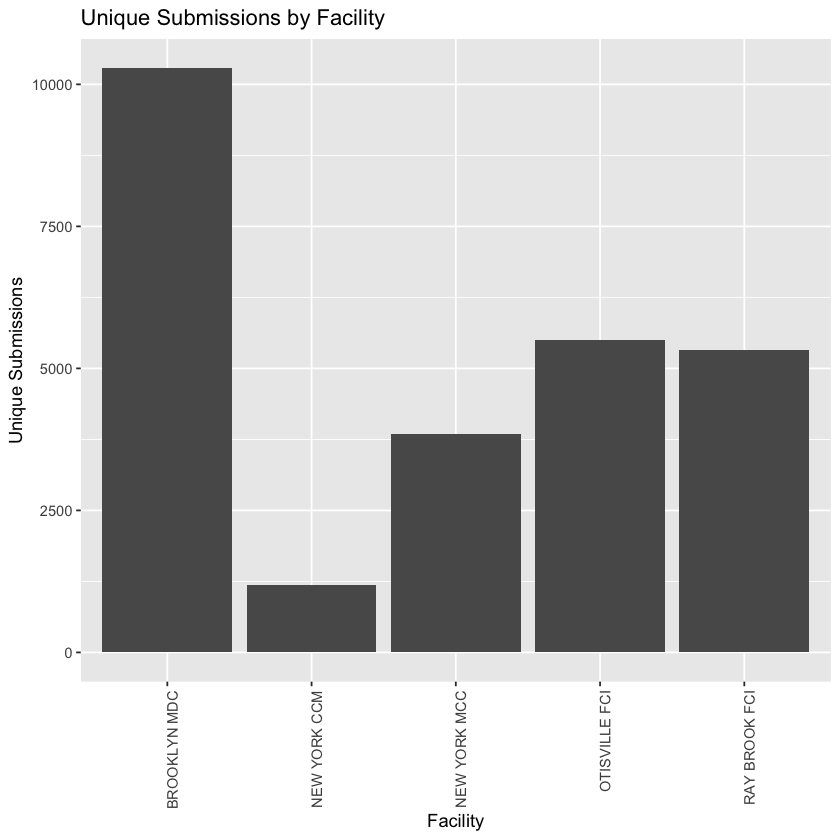

In [ ]:
unique_submissions <- n_distinct(data$Remedy.Case.Number)
print(unique_submissions)

# Count unique submissions by Facility
submission_count_by_facility <- data %>%
  group_by(Facility.of.Occurrence) %>%
  summarise(unique_submissions = n_distinct(Remedy.Case.Number))

# Create a bar plot
ggplot(submission_count_by_facility, aes(x = Facility.of.Occurrence, y = unique_submissions)) +
  geom_bar(stat = "identity") +
  labs(title = "Unique Submissions by Facility", x = "Facility", y = "Unique Submissions") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [20]:
# Count rejections by Status Reason
rejection_reasons <- rejected_submissions %>%
  group_by(Status.Reason.1) %>%
  summarise(count = n())

# View the rejection reasons and counts
print(rejection_reasons)


# A tibble: 36 x 2
   Status.Reason.1                                                         count
   <chr>                                                                   <int>
 1 OTHER/SEE REMARKS                                                        2072
 2 REJECTED: All four pages of your (BP-9) (BP-10) (BP-11) form must be l~   927
 3 REJECTED: Concur with rationale of Regional Office and/or institution ~   331
 4 REJECTED: Due to your allegations, your appeal is being forwarded to a~     8
 5 REJECTED: IMPROPER SUBJECT MATTER (FOI/PA REQUEST,ETC.)                    10
 6 REJECTED: Provide staff verification stating reason untimely filing wa~     8
 7 REJECTED: THE ISSUE YOU RAISE IS NOT A SENSITIVE ISSUE. YOUR REQUEST/A~   657
 8 REJECTED: YOU ARE APPEALING MORE THAN ONE INCIDENT REPORT (INCIDENT NU~   380
 9 REJECTED: YOU DID NOT ATTEMPT INFORMAL RESOLUTION PRIOR TO SUBMISSION ~  2325
10 REJECTED: YOU DID NOT PROVIDE A COPY OF THE ATTACHMENT(S) TO YOUR INST~   291
# i 26 mo

In [26]:
uniquedata <- read.csv("../results/UniqueNYSubmissionsEnrichedExpanded.csv", stringsAsFactors = FALSE)
most_common <- sort(table(uniquedata$Remedy.Subject.Code.Translation), decreasing = TRUE)
most_common[1]
head(most_common, 5)



DHO/CDC/CONT. HOUSING APPEALS: DHO APPEAL - COMBINED (PROCEDURES, EVIDENCE & SANCTIONS) 
                                                                                   3351


DHO/CDC/CONT. HOUSING APPEALS: DHO APPEAL - COMBINED (PROCEDURES, EVIDENCE & SANCTIONS) 
                                                                                   3351 
                                                            UDC/RRC ACTIONS: UDC ACTION 
                                                                                   2790 
STAFF/OTHERS - COMPLAINTS: UNPROFESSIONAL, INAPPROPRIATE CONDUCT OR MISCONDUCT BY STAFF 
                                                                                   1488 
                       MEDICAL-EXC. FORCED TREATMENT: MEDICAL CARE - DELAY OR ACCESS TO 
                                                                                   1327 
                               STAFF/OTHERS - COMPLAINTS: OTHER COMPLAINT AGAINST STAFF 
                                                                                   1096 

In [ ]:
freq_table <- table(uniquedata$Remedy.Subject.Code.Translation)

percentages <- prop.table(freq_table) * 100

result <- data.frame(
  Value = names(freq_table),          
  Count = as.vector(freq_table),      
  Percentage = round(as.vector(percentages), 2) 
)

result <- result[order(result$Count, decreasing = TRUE), ]

write.csv(result, "../results/output_percentages_secondaryreason.csv", row.names = FALSE)


In [41]:
summary_data <- aggregate(
  cbind(Count, Percentage) ~ Category, 
  data = result, 
  FUN = sum
)

# Sort data for visualization
summary_data <- summary_data[order(summary_data$Percentage, decreasing = TRUE), ]

# Create a pie chart
ggplot(summary_data, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") + # Converts bar chart to a pie chart
  labs(
    title = "Top 9 Complaints and 'All Others'",
    fill = "Category"
  ) +
  theme_void() + # Removes unnecessary gridlines and axes
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

ggsave("top_complaints_pie_chart.png", width = 8, height = 6)


ERROR: Error in eval(predvars, data, env): object 'Category' not found


In [42]:
uniquedata <- read.csv("../results/UniqueNYSubmissionsEnrichedExpanded.csv", stringsAsFactors = FALSE)
most_common <- sort(table(uniquedata$Primary.Remedy.Subject), decreasing = TRUE)
most_common[1]
head(most_common, 5)

DHO/CDC/CONT. HOUSING APPEALS 
                         6092


DHO/CDC/CONT. HOUSING APPEALS     STAFF/OTHERS - COMPLAINTS 
                         6092                          3033 
MEDICAL-EXC. FORCED TREATMENT               UDC/RRC ACTIONS 
                         2965                          2813 
      OPERATIONS, INSTITUTION 
                         1498 

In [51]:
# make frequency table
freq_table <- table(uniquedata$Primary.Remedy.Subject)

# calculate percentages
percentages <- prop.table(freq_table) * 100

# create a clean data frame
result <- data.frame(
  Value = names(freq_table),          # Explicitly use names for the values
  Count = as.vector(freq_table),      # Convert the counts to a vector
  Percentage = round(as.vector(percentages), 2) # Convert percentages to a clean numeric vector
)

# sort by count in descending order
result <- result[order(result$Count, decreasing = TRUE), ]

# write the result to a CSV file
write.csv(result, "../results/output_percentages_primaryreason.csv", row.names = FALSE)

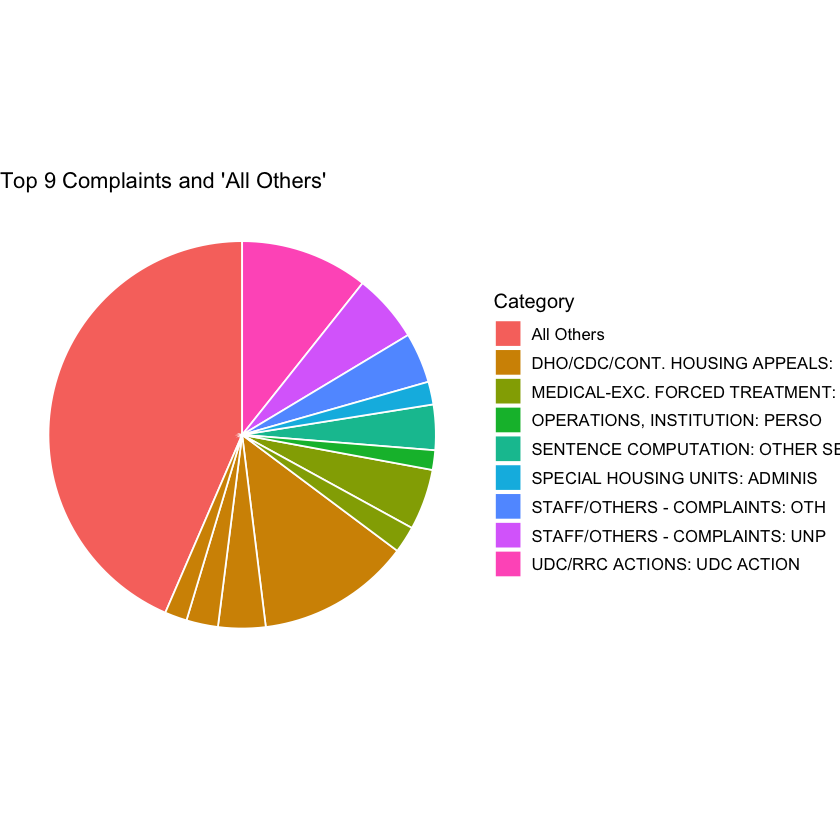

In [49]:
# Load necessary libraries
library(ggplot2)

# Make frequency table
freq_table <- table(uniquedata$Remedy.Subject.Code.Translation)

# Calculate percentages
percentages <- prop.table(freq_table) * 100

# Create a clean data frame
result <- data.frame(
  Value = names(freq_table),          # Explicitly use names for the values
  Count = as.vector(freq_table),      # Convert the counts to a vector
  Percentage = round(as.vector(percentages), 2) # Convert percentages to a clean numeric vector
)

# Sort by count in descending order
result <- result[order(result$Count, decreasing = TRUE), ]

# Aggregate top 9 complaints and combine others into "All Others"
top_n <- 12
result$Category <- ifelse(
  rank(-result$Percentage, ties.method = "first") <= top_n, 
  result$Value, 
  "All Others"
)

# Summarize data by category
summary_data <- aggregate(
  cbind(Count, Percentage) ~ Category, 
  data = result, 
  FUN = sum
)

# Shorten labels to a maximum of 30 characters (or any length you prefer)
summary_data$Category <- substr(summary_data$Category, 1, 30)

# Sort the summarized data by percentage
summary_data <- summary_data[order(summary_data$Percentage, decreasing = TRUE), ]

# Create a pie chart
ggplot(summary_data, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") + # Converts bar chart to pie chart
  labs(
    title = "Top 9 Complaints and 'All Others'",
    fill = "Category"
  ) +
  theme_void() + # Removes unnecessary gridlines and axes
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )


In [ ]:
# make frequency table
freq_table <- table(data$Primary.Remedy.Subject)

# calculate percentages
percentages <- prop.table(freq_table) * 100

# create a clean data frame
result <- data.frame(
  Value = names(freq_table),          # Explicitly use names for the values
  Count = as.vector(freq_table),      # Convert the counts to a vector
  Percentage = round(as.vector(percentages), 2) # Convert percentages to a clean numeric vector
)

# sort by count in descending order
result <- result[order(result$Count, decreasing = TRUE), ]

# write the result to a CSV file
write.csv(result, "../results/output_percentages_primaryreason.csv", row.names = FALSE)